# Analysing HDB resale prices

First we import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

We import the data from the CSV file (source: data.gov.sg) and check for any NA values.

In [2]:
df = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

Lets take a look at the resale price data from 2017 onwards

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


Lets find out the maximum and minimum resale flat price.

In [4]:
df['resale_price'].max()

1588000.0

In [5]:
df['resale_price'].min()

140000.0

What are the flats transacted at the maximum and minimum price?

In [6]:
df[df['resale_price'] == df['resale_price'].max()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
181260,2024-06,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,34 TO 36,112.0,Improved,2016,90 years 08 months,1588000.0
181265,2024-06,BUKIT MERAH,5 ROOM,96A,HENDERSON RD,46 TO 48,113.0,Improved,2019,94 years,1588000.0


In [7]:
df[df['resale_price'] == df['resale_price'].min()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
67560,2020-02,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,10 TO 12,67.0,Improved,1971,49 years 11 months,140000.0


## When will we get the first $2 million resale flat?

First, we will extract the maximum resale flat price for each year and month

In [8]:
df_2mil = pd.DataFrame()
df_2mil['year_month'] = df['month']
df_2mil['resale_price'] = df['resale_price']

df_2mil = df_2mil.groupby('year_month').max().reset_index()
df_2mil['month'] = pd.Series(range(0,160))
df_2mil.tail()

,year_month,resale_price,month
86,2024-03,1450000.0,86
87,2024-04,1438000.0,87
88,2024-05,1515000.0,88
89,2024-06,1588000.0,89
90,2024-07,1568000.0,90


Next, lets plot a scatter graph.

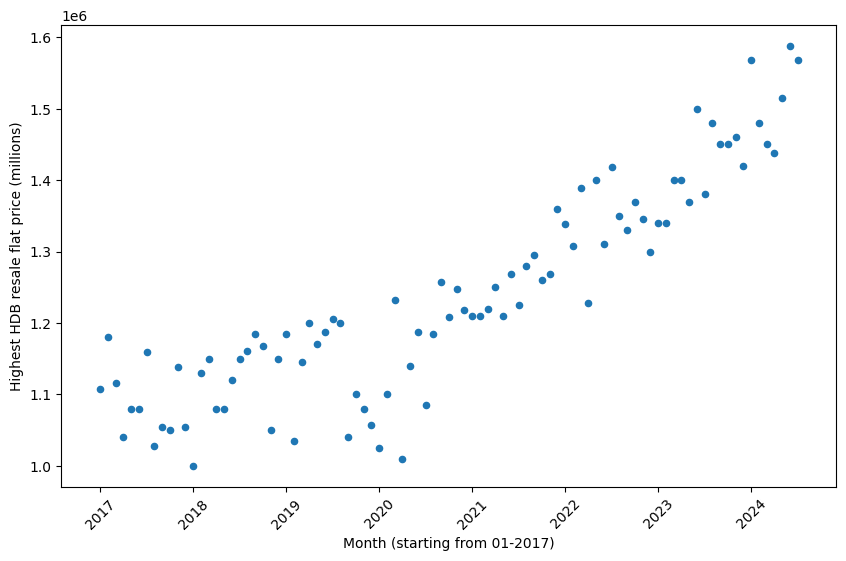

In [9]:
fig_2mil, ax_2mil = plt.subplots(figsize=(10,6))

df_2mil.plot(kind='scatter', x='year_month', y='resale_price', ax=ax_2mil, xlabel='Month (starting from 01-2017)', ylabel='Highest HDB resale flat price (millions)')
ax_2mil.set_xticks(range(0, 160, 12), labels=[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030], rotation=45);
ax_2mil.set_xlim(-5, 95);

Let's plot a linear regression to extrapolate the line of best fit. I will use data from 2021 onwards since it is after the pandemic.

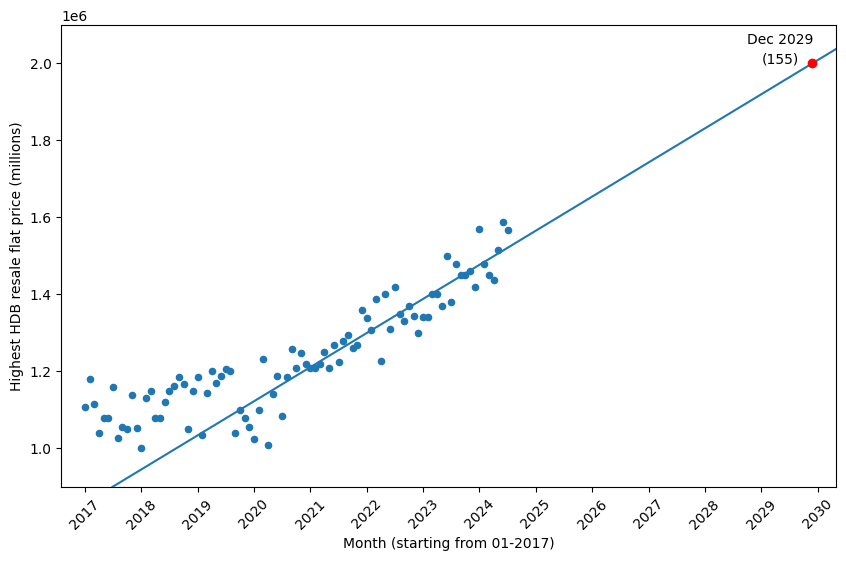

In [10]:
slope, intercept, r, p, se = stats.linregress(x=df_2mil[df_2mil['month'] >= 48]['month'], y=df_2mil[df_2mil['month'] >= 48]['resale_price'])

ax_2mil.axline((0, intercept), slope=slope)
ax_2mil.set_xlim(-5, 160)
ax_2mil.set_ylim(900000, 2100000)
ax_2mil.plot(((2000000 - intercept) / slope), 2000000, 'ro')
ax_2mil.text(144, 2000000, f'({round((2000000 - intercept) / slope)})')
ax_2mil.text(141, 2050000, f'Dec 2029')

fig_2mil

When we extrapolate the line of best fit, it seems like the first 2 million SGD resale flat will happen on the 155th month from January 2017, which is around <b>December 2029</b>.

## HDB flat resale price by town

Let's find out how location affects HDB resale prices and which towns have the highest and lowest resale prices.

First, we create a new database grouping by each town and taking the median of resale price from 2024.

In [11]:
df_town = df[df['month'].str.split('-').str[0] == '2024'].groupby('town')['resale_price'].median().sort_values(ascending=False)
df_town

town
BUKIT TIMAH        955000.0
BISHAN             790000.0
BUKIT MERAH        773500.0
KALLANG/WHAMPOA    688000.0
PASIR RIS          685000.0
QUEENSTOWN         650000.0
SERANGOON          639888.0
PUNGGOL            630000.0
TAMPINES           630000.0
SENGKANG           610000.0
TOA PAYOH          580000.0
BUKIT PANJANG      578000.0
HOUGANG            576000.0
BUKIT BATOK        570500.0
SEMBAWANG          570000.0
WOODLANDS          555900.0
CENTRAL AREA       555000.0
CHOA CHU KANG      548000.0
GEYLANG            530000.0
YISHUN             521000.0
CLEMENTI           520000.0
MARINE PARADE      515000.0
JURONG WEST        510000.0
BEDOK              488000.0
JURONG EAST        474000.0
ANG MO KIO         465000.0
Name: resale_price, dtype: float64

Next, we plot a bar graph showing the data.

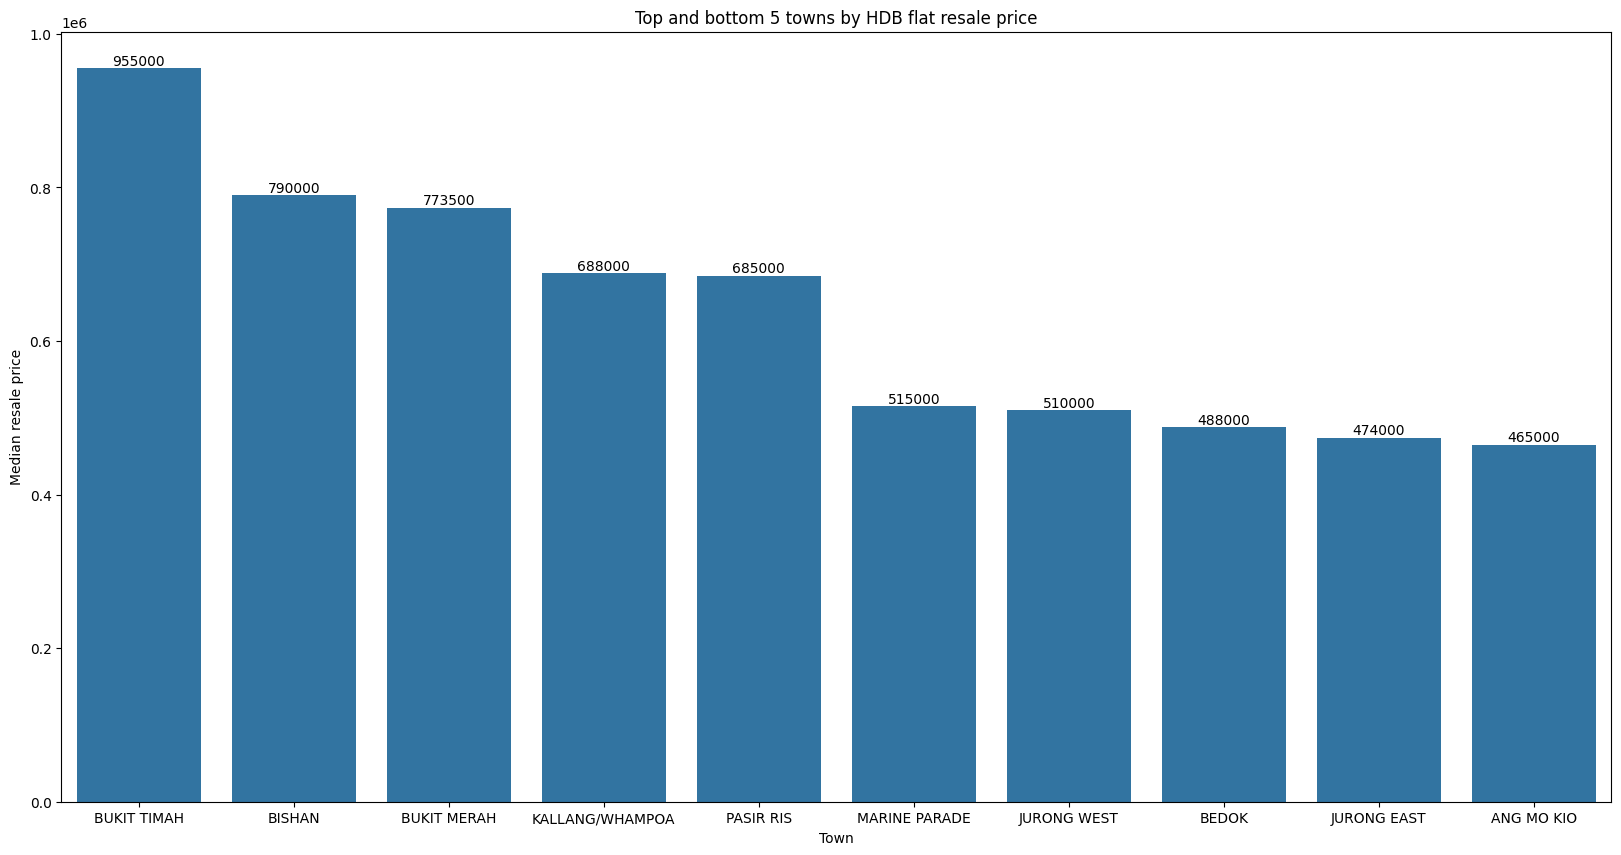

In [12]:
df_town = pd.concat([df_town.head(5), df_town.tail(5)])

fig_town, ax_town = plt.subplots(figsize=(20,10))

sns.barplot(df_town, ax=ax_town);
ax_town.bar_label(ax_town.containers[0], fontsize=10);
ax_town.set_xlabel('Town');
ax_town.set_ylabel('Median resale price');
ax_town.set_title('Top and bottom 5 towns by HDB flat resale price');

Looks like the hottest town with the highest resale price goes to Bukit Timah, at a median price of \\$955,000. The town with the lowest resale price is Ang Mo Kio, with a median price of \\$465,000. 

## Median income vs median HDB flat resale price

Recently, there have been many comments about the rise in resale price for HDB flats, with many claiming that it is becoming increasingly unaffordable. We shall find out if this claim is true by looking at the rise in annual median income compared to the median HDB flat resale price

First, we import the data from the CSV file (source: data.gov.sg).

In [13]:
df_income = pd.read_csv('MedianGrossMonthlyIncomeFromEmploymentofFullTimeEmployedResidentsTotal.csv')
df_income.head()

,year,med_income_incl_empcpf,med_income_excl_empcpf
0,2001,2387,2100
1,2002,2380,2083
2,2003,2410,2100
3,2004,2326,2100
4,2006,2449,2167


In this case, we are interested in the median income in terms of percentage from 2017 onwards. We should also include employer CPF.

In [14]:
df_income = df_income[df_income['year'] >= 2017]
df_income = df_income.drop(['med_income_excl_empcpf'], axis=1)
df_income['median_percentage'] = df_income['med_income_incl_empcpf'] / df_income['med_income_incl_empcpf'].iloc[0] * 100
df_income['type'] = 'Median income'
df_income = df_income[['year', 'type', 'median_percentage']]
df_income

,year,type,median_percentage
15,2017,Median income,100.000000
16,2018,Median income,104.844045
17,2019,Median income,107.821361
18,2020,Median income,107.136106
19,2021,Median income,110.586011
20,2022,Median income,119.801512
21,2023,Median income,122.802457


Next, we find the median resale price of HDB flats for each year from 2017, grouped by flat type (2/3/4/5 room). We find the percentage of HDB resale price since 2017.

In [15]:
df_median_price = df.copy()
df_median_price['year'] = df_median_price['month'].str.split('-').str[0]
df_median_price = df_median_price[df['flat_type'].isin(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM'])]
df_median_price = df_median_price.groupby(['year', 'flat_type'])['resale_price'].median().reset_index().sort_values(['flat_type', 'year'])
df_median_price['median_percentage'] = df_median_price.groupby('flat_type')['resale_price'].apply(lambda x: x.div(x.iloc[0]).mul(100)).values
df_median_price = df_median_price.rename(columns={'flat_type': 'type'})
df_median_price


,year,type,resale_price,median_percentage
0,2017,2 ROOM,240000.0,100.000000
4,2018,2 ROOM,230000.0,95.833333
8,2019,2 ROOM,225000.0,93.750000
12,2020,2 ROOM,230000.0,95.833333
16,2021,2 ROOM,265000.0,110.416667
20,2022,2 ROOM,300000.0,125.000000
24,2023,2 ROOM,320000.0,133.333333
28,2024,2 ROOM,335000.0,139.583333
1,2017,3 ROOM,301888.0,100.000000
5,2018,3 ROOM,290000.0,96.062116


Finally, we can plot the graph.

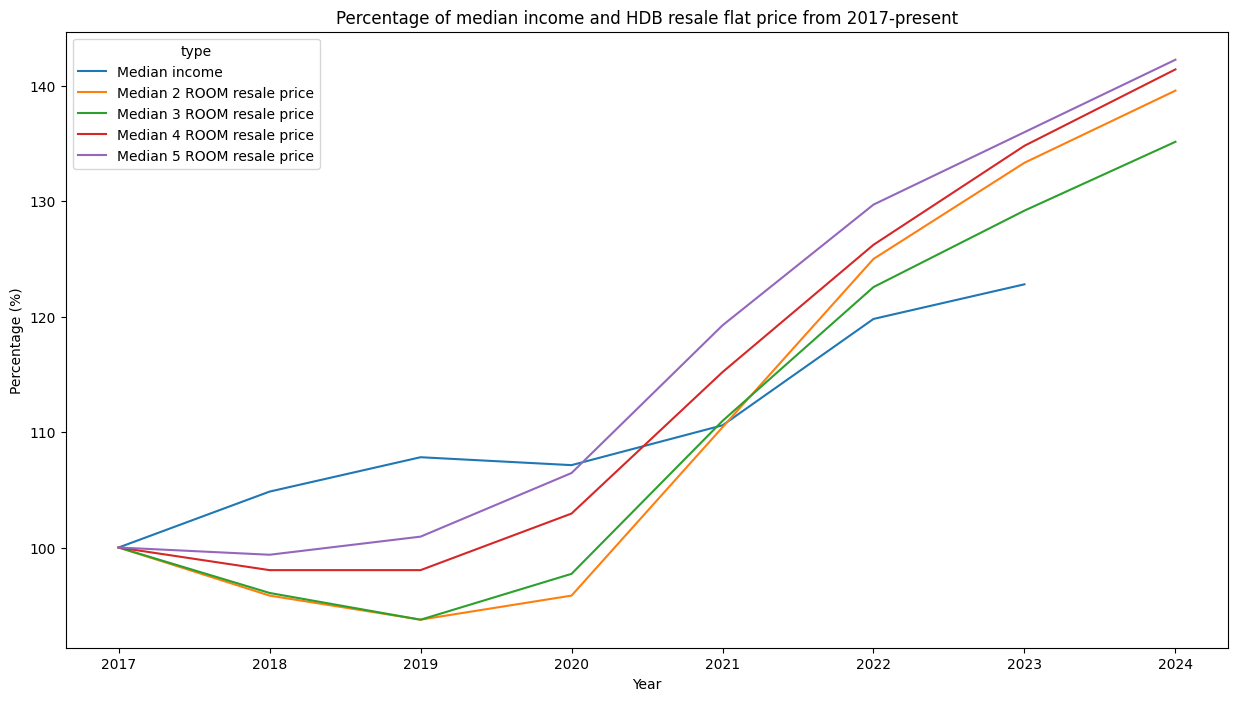

In [16]:
df_median_price = df_median_price[['year', 'type', 'median_percentage']].copy();
df_median_price['type'] = 'Median ' + df_median_price['type'] + ' resale price'
df_median_price = pd.concat([df_income, df_median_price])

fig_median_percentage, ax_median_percentage = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_median_price, x='year', y='median_percentage', hue='type', ax=ax_median_percentage);
ax_median_percentage.set_title('Percentage of median income and HDB resale flat price from 2017-present');
ax_median_percentage.set_xlabel('Year');
ax_median_percentage.set_ylabel('Percentage (%)');

From the graph, we can see that median income surged ahead from 2017 to 2019 while HDB flat resale prices dipped. During that period, we can conclude that resale flats had indeed became more affordable.

However, after the Covid pandemic hit, HDB flat resale prices soared with no signs of slowing down while median income struggled to keep pace. In 2023, we can see that median income has only increased to 120% of 2017 while 5 room resale flats have increased to almost 135%. Given how this trend is still going strong in 2024, median income is likely to further lag behind HDB resale prices.

## How does the number of years left on the lease affect HDB resale price?

Generally, the HDB resale flat price peaks at about 80-90 years left on the lease and then starts to dip. Theoretically, it should go down all the way to $0 when the lease expires. Let's try and visualise this using a graph. First, we should try to eliminate variables such as the flat type and town which would greatly influence the flat price. I'll use data from 2023 since it's the most recent year and select 4 room flats from Toa Payoh only.

In [17]:
df_lease = df[(df['flat_type'] == '4 ROOM') & (df['month'].str.split('-').str[0] == '2023') & (df['town'] == 'TOA PAYOH')].copy();
df_lease['years_left'] = df_lease['remaining_lease'].str.split().str[0];

Next, we should group by the number of years left on the lease and then calculate the median resale price. Then we can plot this on the graph.

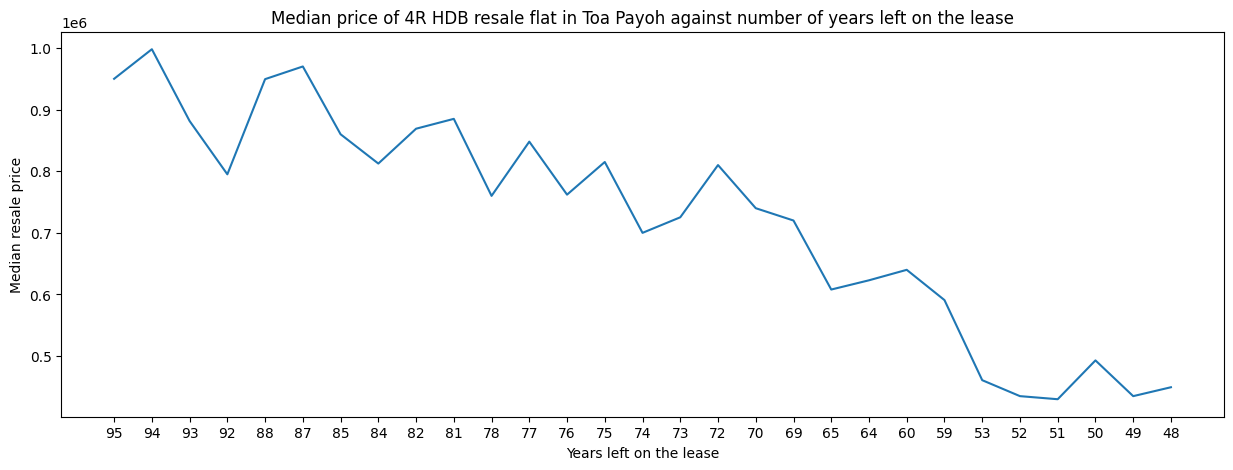

In [18]:
df_lease_plot = df_lease.groupby('years_left')['resale_price'].median().sort_index(ascending=False)

fig_lease, ax_lease = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_lease_plot);
ax_lease.set_title('Median price of 4R HDB resale flat in Toa Payoh against number of years left on the lease');
ax_lease.set_xlabel('Years left on the lease');
ax_lease.set_ylabel('Median resale price');

We can indeed see that after MOP has been reached, 4R resale flats in Toa Payoh are being sold for an average of close to a million dollars while after half the lease has passed, the price has dropped to about half as well. The raw data for the first few and last few years are shown below.

In [19]:
pd.concat([df_lease_plot.head(3), df_lease_plot.tail(3)])

years_left
95    950000.0
94    998000.0
93    881500.0
50    493000.0
49    435000.0
48    449444.0
Name: resale_price, dtype: float64